In [ ]:
!pip uninstall matplotlib
!pip install matplotlib

Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? N


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import itertools

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practicum/v1/df')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Analysis

In [ ]:
feature = 'PRACTAGE'

The goal of this analysis is to find a numerical basis for including WORKSTAT as a variable in our model. For probability, one way to substantiate is to show that there is significant variance in the probabilities of a claim resulting in a payment based upon a practitioner's licensing state.

In [ ]:
df = df[[feature, 'PMT', 'TOTALPMT_ADJ']]
df['count'] = 1

Below, probability is simpy the the number of rows for each WORKSTAT where totalpmt is greater than zero divided by the number of rows for each WORKSTAT.

The results below indicate that allegations towards practitioners licensed by states such as NY (.326 probability) have a higher likelihood of resulting in a payment than practitioners licensed by states such as Idaho (.155 probability). This variance is one substantiation for using LICNSTAT as a variable, as the results below indicate that the state from which the practitioner is licensed impacts the likelihood of an allegation resulting in a payment.

In [ ]:
df = df.groupby(by = feature).sum()
df['Probability'] = df['PMT']/df['count']
df = df.sort_values(by = 'Probability', ascending = False)
df[feature] = df.index

# Convert practage to str type for graph purposes
df['PRACTAGE'] = df['PRACTAGE'].apply(lambda x: str(x))

In [ ]:
check = df['count'].sum()
check

# The result 1,422,676 is from exclusion of rows where LICNSTAT is null

1511514

Graph

In [ ]:
# sort values by 'count' to form
df = df.sort_values(by = 'Probability', ascending = False)

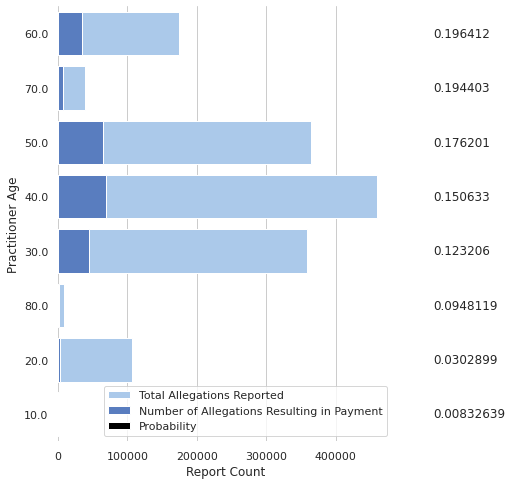

In [ ]:
fig, ax = plt.subplots(figsize=(6, 8))

sns.set_theme(style="whitegrid")

sns.set_color_codes("pastel")
chart_1 = sns.barplot(x="count", y=feature, data=df, label="Total Allegations Reported", color="b")

sns.set_color_codes("muted")
chart_2 = sns.barplot(x="PMT", y=feature, data=df, label="Number of Allegations Resulting in Payment", color="b")

chart_3 = sns.barplot(x="Probability", y=feature, data=df, label="Probability", color="black")

chart_1.bar_label(chart_1.containers[2], padding = 375)

ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(ylabel="Practitioner Age", xlabel="Report Count")
sns.despine(left=True, bottom=True)